In [1]:
import pandas as pd
df = pd.read_csv("credit_card_transaction.csv")
print(df.shape)
df.head()

(50000, 9)


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [3]:
!pip install gender-guesser
import gender_guesser.detector as gender

# Initialize the detector
detector = gender.Detector()

# Function to guess gender from name
def guess_gender(name):
    if pd.isnull(name):
        return 'OTHER'
    guess = detector.get_gender(name.split()[0])
    if guess in ['female', 'mostly_female']:
        return 'F'
    elif guess in ['male', 'mostly_male']:
        return 'M'
    else:
        return 'OTHER'


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Fill missing Gender using the Name column
df['Gender'] = df.apply(
    lambda row: guess_gender(row['Name']) if pd.isnull(row['Gender']) or row['Gender'] in ['nan', 'NaN', ''] else row['Gender'],
    axis=1
)
# Optional: Clean again
df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()
df['Gender'] = df['Gender'].where(df['Gender'].isin(['M', 'F']), 'OTHER')


In [5]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,F,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              50000 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [7]:
# Convert to datetime
df['Birthdate'] = pd.to_datetime(df['Birthdate'], errors='coerce', dayfirst=True)

# Calculate age
df['Customer_Age'] = pd.Timestamp("2024-01-01") - df['Birthdate']
df['Customer_Age'] = (df['Customer_Age'].dt.days / 365).astype(int)

# Optional: drop outliers (e.g. age > 100 or < 10)
df = df[(df['Customer_Age'] >= 10) & (df['Customer_Age'] <= 100)]

df[['Birthdate', 'Customer_Age']].describe()


,Birthdate,Customer_Age
count,50000,50000.000000
mean,1977-04-27 06:55:17.759999968,46.497840
min,1948-11-02 00:00:00,18.000000
25%,1962-10-30 00:00:00,32.000000
50%,1976-10-26 00:00:00,47.000000
75%,1991-10-23 00:00:00,61.000000
max,2005-10-19 00:00:00,75.000000
std,NaN,16.831256


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

df['Transaction_Year'] = df['Date'].dt.year
df['Transaction_Month'] = df['Date'].dt.month
df['Transaction_Weekday'] = df['Date'].dt.day_name()
df['Transaction_Hour'] = df['Date'].dt.hour  # If time is available in 'Date'


In [9]:
# Group less common categories
category_counts = df['Category'].value_counts()
top_categories = category_counts[category_counts > 100].index

df['Category'] = df['Category'].apply(lambda x: x if x in top_categories else 'Other')
df['Category'].value_counts()

Category
Restaurant     8413
Market         8382
Travel         8377
Electronics    8324
Clothing       8261
Cosmetic       8243
Name: count, dtype: int64

In [10]:
# Check missing values again
df.isnull().sum()

# Drop rows with missing Birthdate or Date
df.dropna(subset=['Birthdate', 'Date'], inplace=True)


In [11]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Customer_Age,Transaction_Year,Transaction_Month,Transaction_Weekday,Transaction_Hour
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,2023,4,Monday,0
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,2023,7,Monday,0
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,2023,9,Wednesday,0
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,2023,1,Wednesday,0
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,2023,6,Tuesday,0


In [12]:
if 'Transaction_Hour' in df.columns:
    df.drop('Transaction_Hour', axis=1, inplace=True)
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Customer_Age,Transaction_Year,Transaction_Month,Transaction_Weekday
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,2023,4,Monday
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,2023,7,Monday
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,2023,9,Wednesday
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,2023,1,Wednesday
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,2023,6,Tuesday


In [13]:
import numpy as np

np.random.seed(42)
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Seattle', 'Miami', 'Denver', 'Boston', 'Atlanta']
df['City'] = np.random.choice(cities, size=len(df))
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Customer_Age,Transaction_Year,Transaction_Month,Transaction_Weekday,City
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,2023,4,Monday,Miami
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,2023,7,Monday,Houston
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,2023,9,Wednesday,Denver
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,2023,1,Wednesday,Phoenix
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,2023,6,Tuesday,Miami


In [14]:
API_KEY = '3RNZTDZ4LCA8569KCM5VCN8GF'
import requests
import time

def get_weather(city, date):
    """
    Fetches historical weather for a given city and date (yyyy-mm-dd).
    Returns the weather condition as string (e.g., 'Rain', 'Clear', etc.)
    """
    try:
        url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city}/{date}?key={API_KEY}&unitGroup=metric&include=days&elements=datetime,conditions,temp"
        response = requests.get(url)
        data = response.json()
        
        # Extract weather condition (e.g. 'Rain', 'Clear', 'Cloudy')
        condition = data['days'][0]['conditions']
        return condition
    except Exception as e:
        print(f"Error fetching weather for {city} on {date}: {e}")
        return 'Unknown'


In [15]:
# Create a column for weather
weather_list = []

for index, row in df.head(100).iterrows():  # Adjust number as needed
    city = row['City']
    date = row['Date'].strftime('%Y-%m-%d')  # Convert datetime to string
    weather = get_weather(city, date)
    weather_list.append(weather)
    time.sleep(1)  # Prevent hitting rate limit

# Assign results back
df.loc[df.index[:100], 'Weather'] = weather_list
df[['City', 'Date', 'Weather']].head(10)
df['Weather'].value_counts()

Weather
nan                             49900
Partially cloudy                   46
Rain, Partially cloudy             29
Clear                              12
Rain, Overcast                      8
Snow, Rain, Partially cloudy        2
Snow, Rain, Overcast                1
Snow, Partially cloudy              1
Overcast                            1
Name: count, dtype: int64

In [16]:
import numpy as np

# Define weather options for each season
season_weather = {
    'Winter': ['Snow', 'Foggy', 'Cloudy', 'Clear'],
    'Spring': ['Sunny', 'Rain', 'Cloudy', 'Clear'],
    'Summer': ['Sunny', 'Humid', 'Rain', 'Clear'],
    'Autumn': ['Windy', 'Rain', 'Cloudy', 'Overcast']
}
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [17]:

# Now add Season column
df['Season'] = df['Date'].apply(get_season)
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Customer_Age,Transaction_Year,Transaction_Month,Transaction_Weekday,City,Weather,Season
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,2023,4,Monday,Miami,Partially cloudy,Spring
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,2023,7,Monday,Houston,Clear,Summer
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,2023,9,Wednesday,Denver,"Rain, Partially cloudy",Autumn
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,2023,1,Wednesday,Phoenix,Partially cloudy,Winter
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,2023,6,Tuesday,Miami,"Rain, Partially cloudy",Summer


In [18]:
import numpy as np
def simulate_weather(row):
    if pd.isna(row['Weather']):
        return np.random.choice(season_weather.get(row['Season'], ['Clear']))
    else:
        return row['Weather']

df['Weather'] = df['Weather'].replace('nan', np.nan)

df['Weather'] = df.apply(simulate_weather, axis=1)


In [19]:
df['Weather'].isnull().sum()          # should now be 0
df['Weather'].value_counts()[:10]     # check new distribution


Weather
Clear               10696
Rain                 9935
Cloudy               8343
Sunny                8089
Humid                3998
Foggy                2599
Snow                 2531
Windy                1911
Overcast             1811
Partially cloudy       46
Name: count, dtype: int64

In [20]:
def assign_mood(row):
    if row['Weather'] in ['Rainy', 'Foggy']:
        return 'Lazy'
    elif row['Transaction_Weekday'] in ['Saturday', 'Sunday']:
        return 'Relaxed'
    elif row['Season'] == 'Winter':
        return 'Low Energy'
    elif row['Weather'] == 'Sunny' and row['Transaction_Weekday'] in ['Friday', 'Saturday']:
        return 'Happy'
    else:
        return 'Neutral'

df['Mood'] = df.apply(assign_mood, axis=1)
df['Mood'].value_counts()


Mood
Neutral       27152
Relaxed       13543
Low Energy     5527
Lazy           2599
Happy          1179
Name: count, dtype: int64

In [21]:
from datetime import timedelta

# Make sure both columns are datetime
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Date'] = pd.to_datetime(df['Date'])

# Function to check if transaction is within 15 days before birthday
def is_near_birthday(row):
    bday_this_year = row['Birthdate'].replace(year=row['Date'].year)
    delta = (bday_this_year - row['Date']).days
    return 0 <= delta <= 15  # Only if it's on or before birthday (but not after)

# Apply
df['Is_Near_Birthday'] = df.apply(is_near_birthday, axis=1)


In [22]:
def spend_bucket(amount):
    if amount < 200:
        return 'Low'
    elif amount < 1000:
        return 'Moderate'
    elif amount < 2500:
        return 'High'
    else:
        return 'Very High'

df['Spend_Bucket'] = df['Transaction Amount'].apply(spend_bucket)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: clean style
sns.set(style="whitegrid")

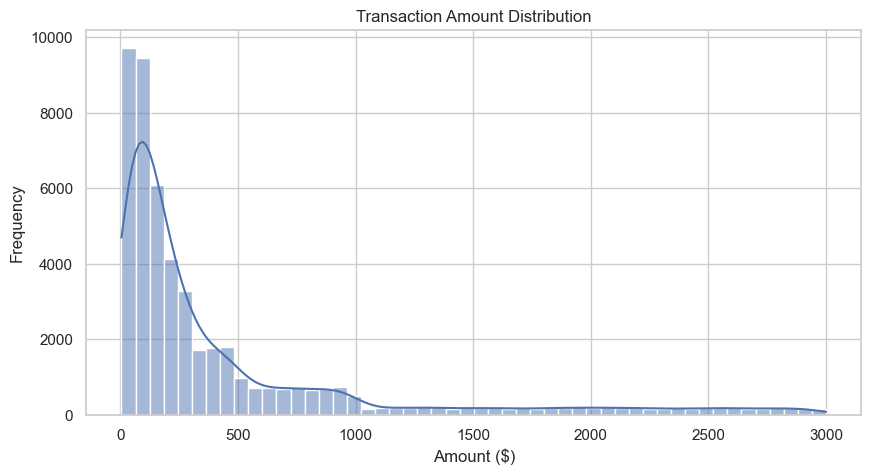

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Transaction Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

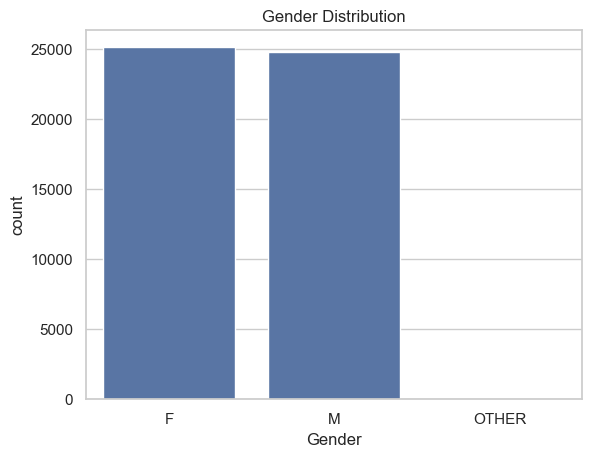

In [25]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


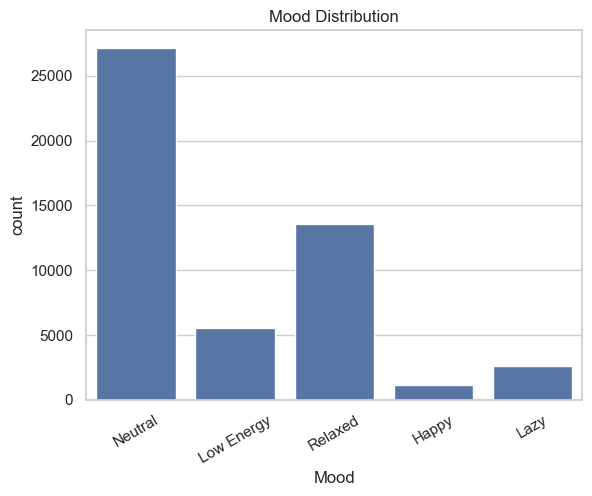

In [26]:
sns.countplot(data=df, x='Mood')
plt.title("Mood Distribution")
plt.xticks(rotation=30)
plt.show()


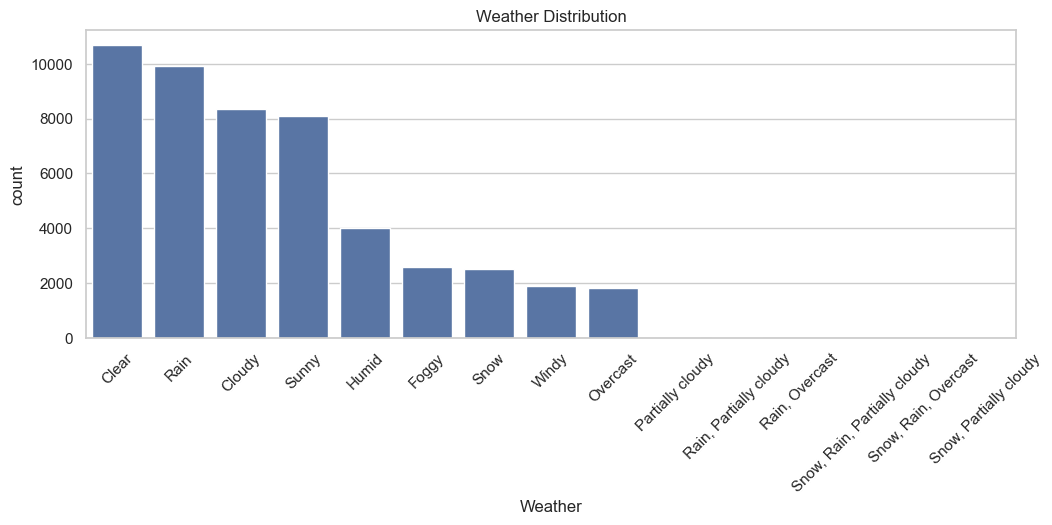

In [27]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title("Weather Distribution")
plt.xticks(rotation=45)
plt.show()


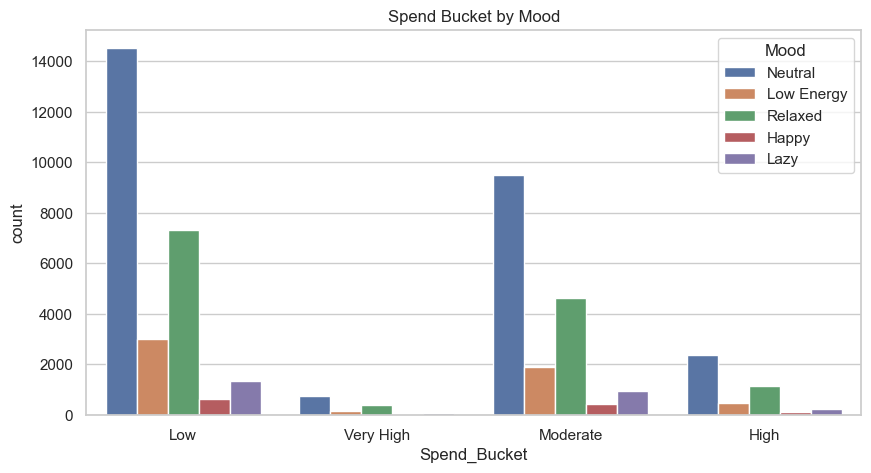

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Spend_Bucket', hue='Mood')
plt.title("Spend Bucket by Mood")
plt.show()


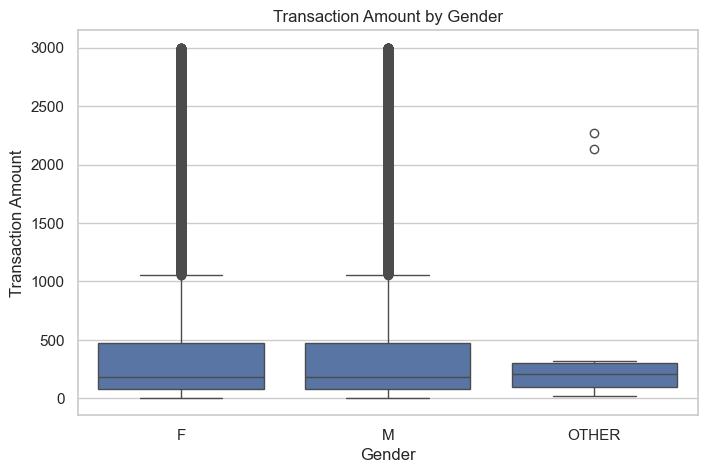

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Transaction Amount')
plt.title("Transaction Amount by Gender")
plt.show()


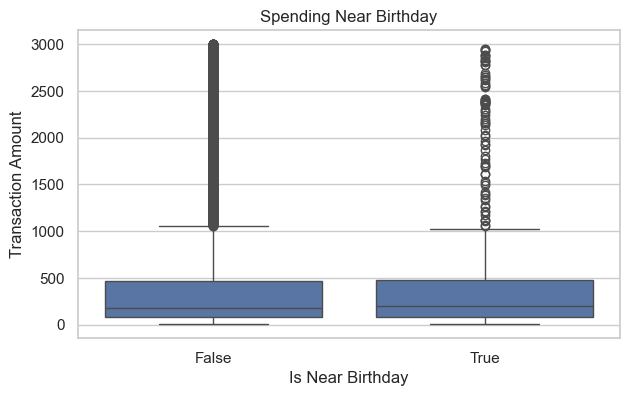

In [30]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Is_Near_Birthday', y='Transaction Amount')
plt.title("Spending Near Birthday")
plt.xlabel("Is Near Birthday")
plt.ylabel("Transaction Amount")
plt.show()


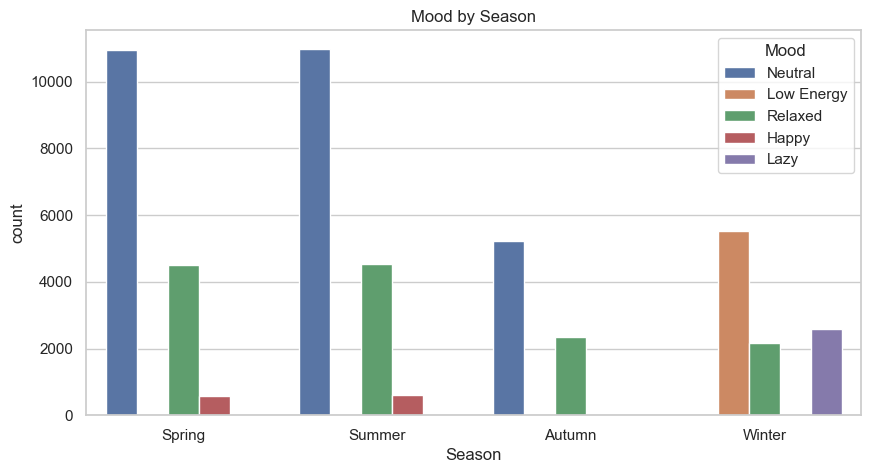

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Season', hue='Mood')
plt.title("Mood by Season")
plt.show()


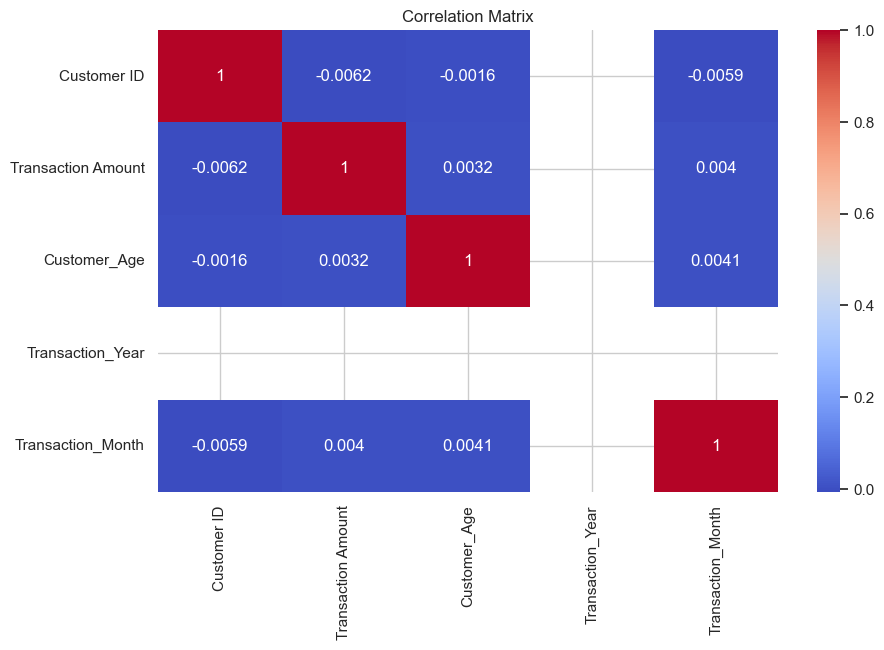

In [32]:
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [33]:
#first model-regression model to predict spending amount
features = ['Customer_Age', 'Gender', 'Mood', 'Season', 'Weather', 'Is_Near_Birthday']
target = 'Transaction Amount'

X = df[features]
y = df[target]

In [34]:
X = pd.get_dummies(X)  # One-hot encoding

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 655.8903893043936
R² Score: -0.10797251472729918


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


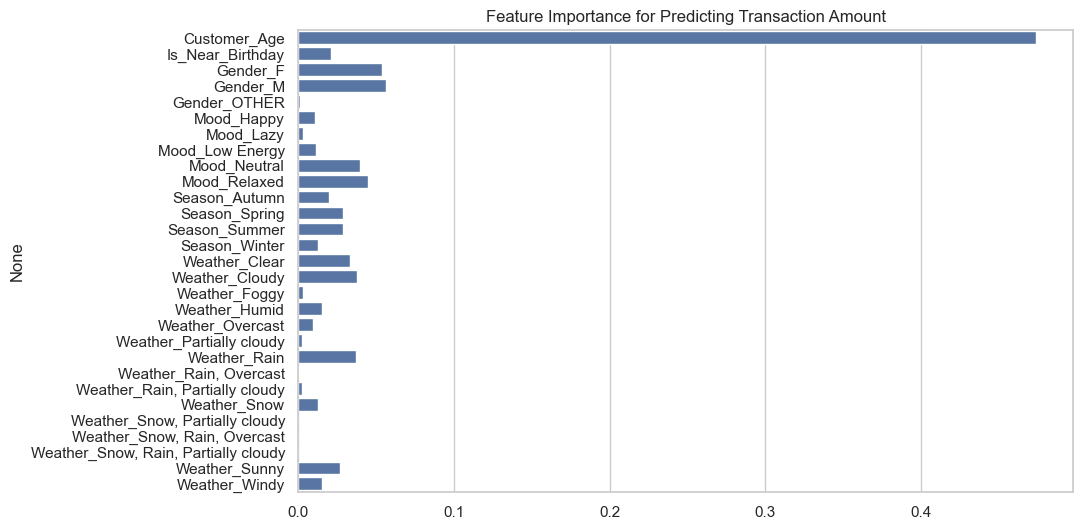

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Predicting Transaction Amount")
plt.show()


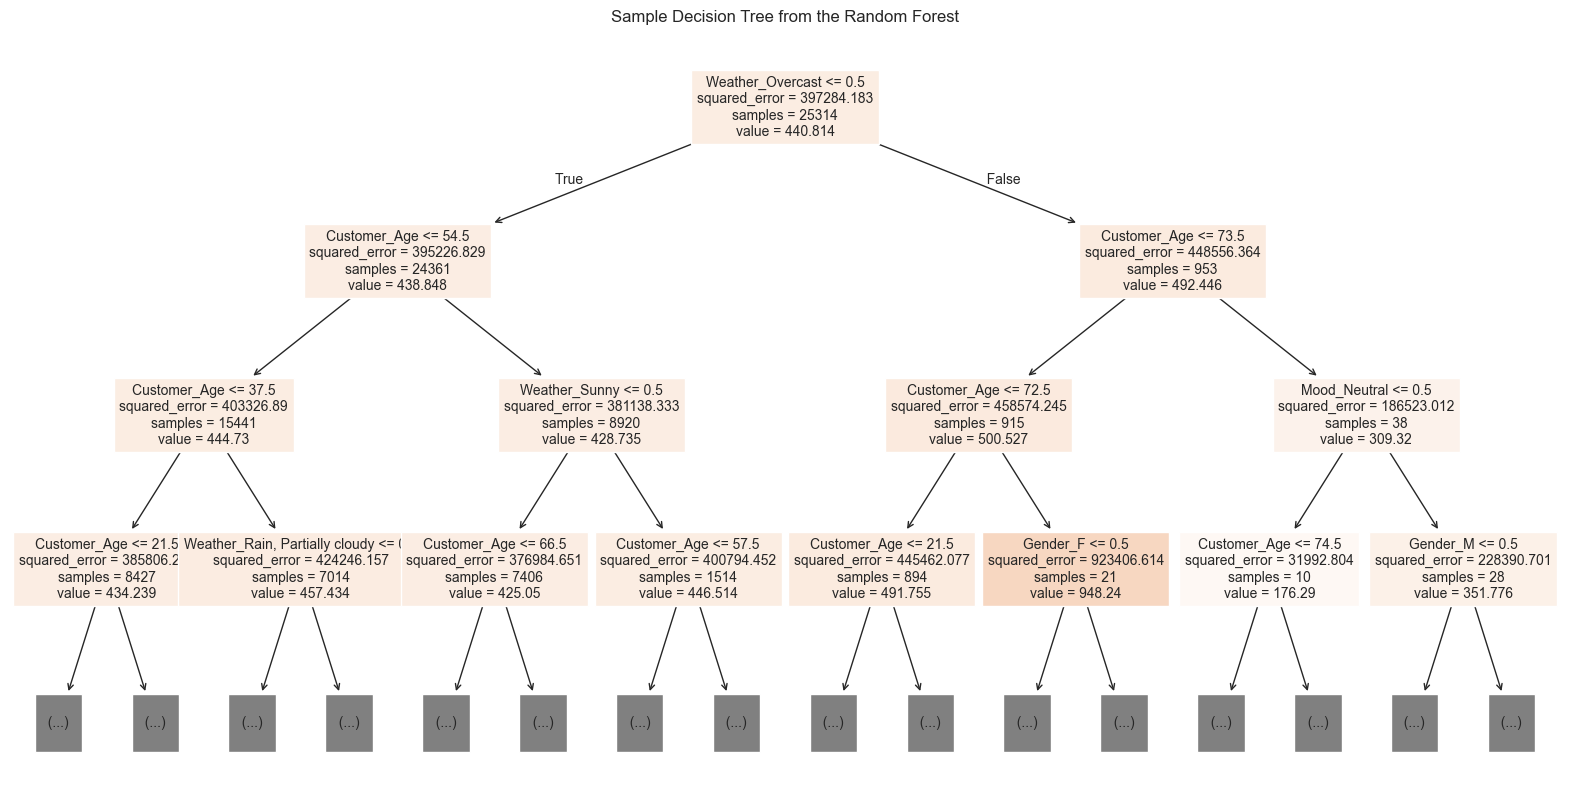

In [39]:
from sklearn.tree import plot_tree

# Pick one tree from the forest
tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Sample Decision Tree from the Random Forest")
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)


Linear Regression RMSE: 623.2499334267975
Linear Regression R²: -0.00043973863005986047


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


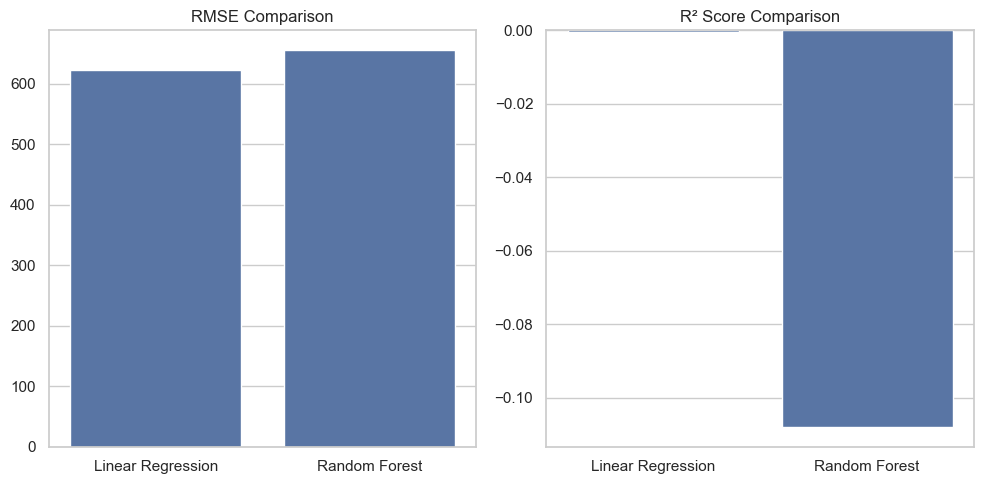

In [41]:
import numpy as np

models = ['Linear Regression', 'Random Forest']
rmse_values = [rmse_lr, rmse]
r2_values = [r2_lr, r2]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=models, y=rmse_values)
plt.title("RMSE Comparison")

plt.subplot(1,2,2)
sns.barplot(x=models, y=r2_values)
plt.title("R² Score Comparison")
plt.tight_layout()
plt.show()


In [42]:
#r2 value was very low, so we are adding new features and we also creating a spend bucket rather than just transactions.
features = ['Customer_Age', 'Gender', 'Mood', 'Season', 'Weather', 'Is_Near_Birthday', 'Category', 'City']
X = df[features]
y = df['Spend_Bucket']
X = pd.get_dummies(X, drop_first=True)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("🔍 Accuracy:", accuracy)

[[ 510   21  204  136]
 [  35 4337 1039    6]
 [ 269  891 2225   70]
 [ 141    8   69   39]]
              precision    recall  f1-score   support

        High       0.53      0.59      0.56       871
         Low       0.82      0.80      0.81      5417
    Moderate       0.63      0.64      0.64      3455
   Very High       0.16      0.15      0.15       257

    accuracy                           0.71     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.71      0.71      0.71     10000

🔍 Accuracy: 0.7111


In [46]:
#now we are adding new classification model to predict category based on various features.
df['Category'].value_counts()

Category
Restaurant     8413
Market         8382
Travel         8377
Electronics    8324
Clothing       8261
Cosmetic       8243
Name: count, dtype: int64

In [47]:

features = [
    'Customer_Age', 'Gender', 'Mood', 'Weather', 'Is_Near_Birthday',
    'Transaction Amount', 'City'
]


In [48]:
X = df[features]
y = df['Category']
X = pd.get_dummies(X, drop_first=True)#puts textual data into numerical data for analytical purposes. 
feature_names = X.columns 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf_cat = RandomForestClassifier(random_state=42)
clf_cat.fit(X_train, y_train)
y_pred = clf_cat.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5033
              precision    recall  f1-score   support

    Clothing       0.34      0.33      0.34      1646
    Cosmetic       0.37      0.37      0.37      1656
 Electronics       0.57      0.53      0.55      1690
      Market       0.42      0.40      0.41      1666
  Restaurant       0.51      0.68      0.58      1678
      Travel       0.86      0.71      0.77      1664

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



In [52]:
print("📏 Length of X.columns:", len(X.columns))
print("📏 Length of feature importances:", len(clf.feature_importances_))


📏 Length of X.columns: 32
📏 Length of feature importances: 39


📏 Length check: 32 32


C:\Users\Prisha\AppData\Local\Temp\ipykernel_19432\3404254342.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='mako')


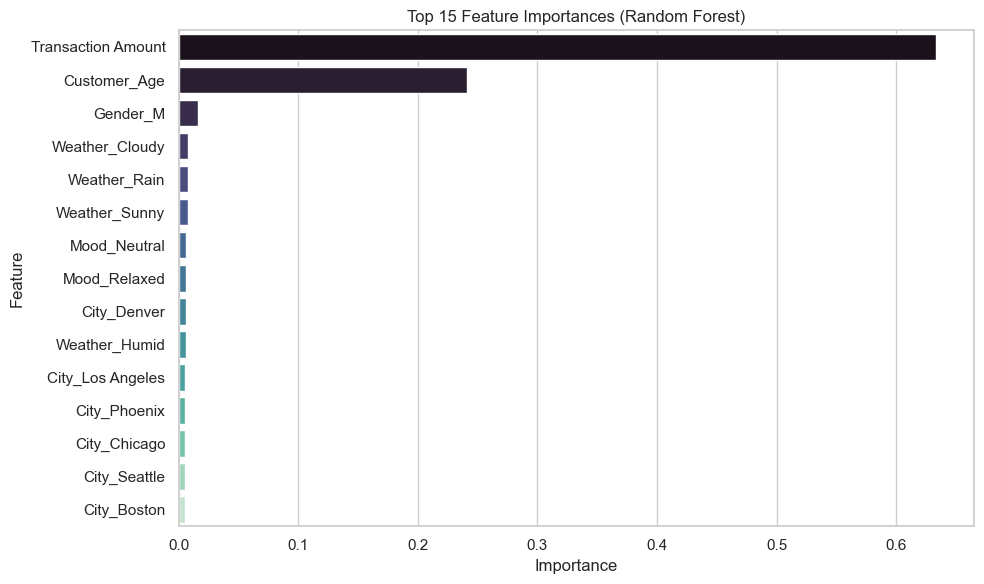

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf_cat.feature_importances_

# Confirm lengths match
print("📏 Length check:", len(feature_names), len(importances))

# Build DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort and plot
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='mako')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [54]:
#we used another classification model-XGBoost to enhance accuracy.
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [143]:
X = df[features]
y = df['Category']
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le_cat = LabelEncoder()
y = le_cat.fit_transform(df['Category'])  # Encoded y
X = pd.get_dummies(X, drop_first=True)#puts textual data into numerical data for analytical purposes. 
feature_names = X.columns 

In [145]:
from sklearn.preprocessing import LabelEncoder
# Initialize the encoder
le = LabelEncoder()
# Fit and transform y
y_encoded = le.fit_transform(y)
# Now do train-test split using y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [147]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
# Decode predictions to original category names
predicted_category_names = le_cat.inverse_transform(y_pred_xgb)

# Preview
print(predicted_category_names[:10])

import joblib
joblib.dump(le_cat, 'label_encoder_category.pkl')


C:\Users\Prisha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:55:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['Restaurant' 'Clothing' 'Clothing' 'Market' 'Electronics' 'Cosmetic'
 'Electronics' 'Travel' 'Restaurant' 'Restaurant']


['label_encoder_category.pkl']

In [139]:
from sklearn.metrics import classification_report, accuracy_score

print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🎯 XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00      1656
           2       1.00      1.00      1.00      1690
           3       1.00      1.00      1.00      1666
           4       1.00      1.00      1.00      1678
           5       1.00      1.00      1.00      1664

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [58]:
y_pred_labels = le.inverse_transform(y_pred_xgb)
#converting back to labels.

In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode y and store encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y = original labels

# Now split encoded labels
X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_enc)
y_pred_rf_enc = rf_model.predict(X_test)

# Train XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_enc)
y_pred_xgb_enc = xgb_model.predict(X_test)


C:\Users\Prisha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:01:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


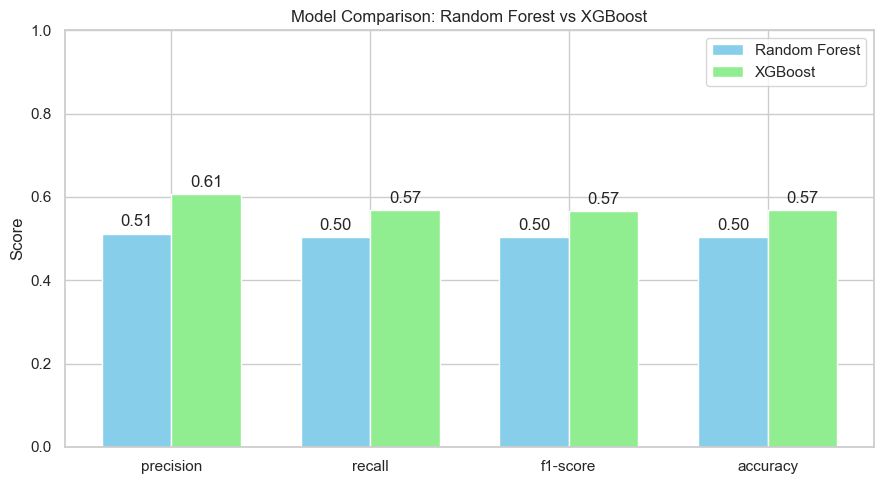

In [60]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Classification reports
rf_report = classification_report(y_test_enc, y_pred_rf_enc, output_dict=True)
xgb_report = classification_report(y_test_enc, y_pred_xgb_enc, output_dict=True)

# Extract metrics including accuracy
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
rf_scores = [
    rf_report['weighted avg']['precision'],
    rf_report['weighted avg']['recall'],
    rf_report['weighted avg']['f1-score'],
    rf_report['accuracy']
]
xgb_scores = [
    xgb_report['weighted avg']['precision'],
    xgb_report['weighted avg']['recall'],
    xgb_report['weighted avg']['f1-score'],
    xgb_report['accuracy']
]

# Plot comparison
x = np.arange(len(metrics))  # Now 4 metrics
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='lightgreen')

# Axis labels and ticks
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Random Forest vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)  # Set upper limit for clarity
ax.legend()

# Annotate scores on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
#comparison between forest regressor and xgboost model.

In [61]:
#model to predict chances of a customer buying near his/her birthday
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 🧠 Setup
features = ['Customer_Age', 'Gender', 'Mood', 'Season', 'Weather', 'Category']
X = df[features]
y = df['Is_Near_Birthday']

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Accuracy
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔮 Probabilities
proba_preds = log_model.predict_proba(X_test)[:, 1]  # Probability of class '1' = Near Birthday


Accuracy: 0.9873
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9873
        True       0.00      0.00      0.00       127

    accuracy                           0.99     10000
   macro avg       0.49      0.50      0.50     10000
weighted avg       0.97      0.99      0.98     10000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


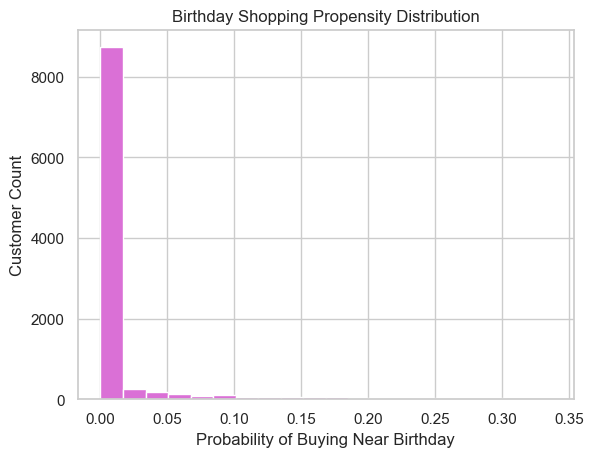

In [62]:
import matplotlib.pyplot as plt

plt.hist(proba_preds, bins=20, color='orchid')
plt.xlabel('Probability of Buying Near Birthday')
plt.ylabel('Customer Count')
plt.title('Birthday Shopping Propensity Distribution')
plt.show()


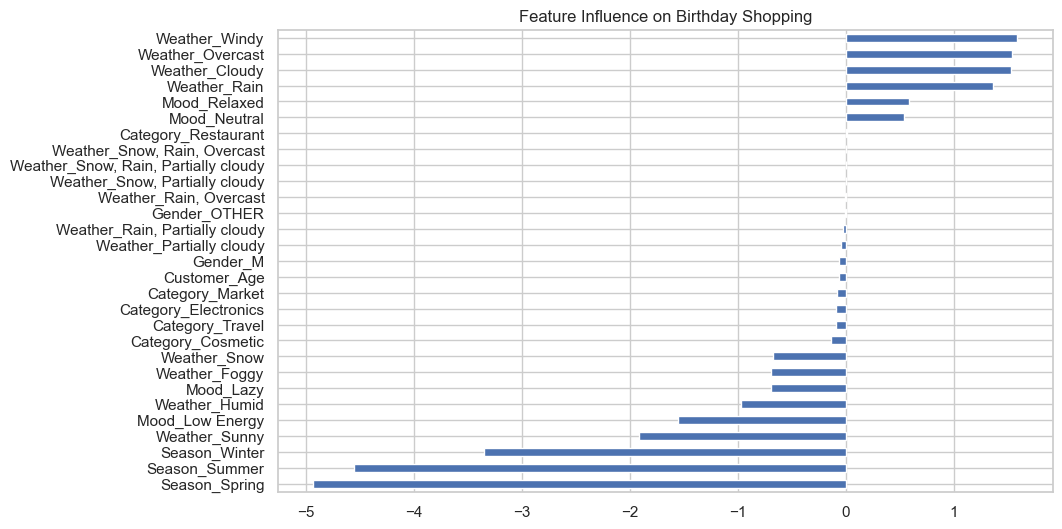

In [63]:
# Get feature importance (coefficients)
import numpy as np
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Influence on Birthday Shopping")
plt.show()


In [64]:
import joblib

# Save with compression
joblib.dump(rf, 'spend_amount_model.pkl', compress=('zlib', 9))       # Big file
          # Small
joblib.dump(log_model, 'birthday_model.pkl')                  # very Small


['birthday_model.pkl']

In [65]:
df.to_csv("updated_customer_data.csv", index=False)

In [151]:
joblib.dump(xgb_model, 'category_model.pkl', compress=3)        

['category_model.pkl']